In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import urllib.request
import seaborn as sns

# IMPORTANT - Terms of Service Agreements

Many websites forbid the use of automated web scrapers. Web scraping is not illegal, but it may violate the terms of service for these sites, and *publishing* scraped data may be in violation of copyright.

Wikipedia's data is available under a [Creative Commons Attribution-ShareAlike License (v 4.0)](https://en.wikipedia.org/wiki/Wikipedia:Text_of_the_Creative_Commons_Attribution-ShareAlike_4.0_International_License)

We are not legal experts on this, and this may vary on a case-by-case basis with various websites.

Please be careful.

# ALSO IMPORTANT - Rate Limits/DOS Attacks

Sometimes It *DOES* Hurt to Ask

You may have heard the term "[DOS (Denial-of-service) attack](https://en.wikipedia.org/wiki/Denial-of-service_attack)". This occurs when a website is flooded with so many HTTP requests to the point that it can no longer maintain operable status.

Even if you don't *intend* to perform a DOS attack, you may accidentally write code that generates too many request in a short span of time.

Many websites safeguard against DOS attacks by limiting how many requests may be made from a specific IP address within a given time period. If you send too many requests to a given site, your access to it your current IP address may be suspended or revoked. Also, most websites do not make this information public.

Larger-scale domains like wikipedia.org are less likely to shut down your requests, since they already expect a high volume of traffic.

For smaller sites, one can avoid sending too many requests all at once by spacing them out with the `sleep()` function in Python's `time` module.

One way to prevent your scraping activities from appearing as a DOS attack is to use the `sleep()` function from Python's `time` module. This lets you insert delays into your code so a for loop won't try to do everything one after another.

In [ ]:
from time import sleep

for x in range(0,5):
  print(x)
  sleep(5)

0


# RELATED - Library Databases

*Please do not try to scrape Library databases.*

Our access to databses has been shut down before when students tried to scrape data from them. There are usually other ways to obtain data in bulk from our databases; if you need assistance with this, please make an appointment with one of the subject librarians.



## Wikipedia Tables

Wikipedia articles often contain tabular data. It can be helpful to see data in a table, especially if you're concerned with the exact numbers, but if you're trying to get a general idea about the data, it is usually more helpful to see it in a graph.

We have an example here of a Wikipedia article that contains a table that *sort of* conveys information, but which would work much better as a visualization:


https://en.wikipedia.org/wiki/College_admissions_in_the_United_States

Let's look specifically at this table:

*Applications, admission and enrollment at 56 schools with admit rate averaging below 22% in Fall 2019–Fall 2022.\[56]*

*Source: Common Data Sets / College announcements and publications*

We are going to create a simple visualization from the data in this table that shows how applications, admissions, and acceptance have changed over time within the subgroups of universities included in the survey.


# Python Libraries for Web Scraping


# Requests

Versatile and simple to use, the Python `requests` module is suitable for handling HTTP requests (GET, POST, PUT, DELETE).

Here we use the `.get()`method to retrieve the contents of the website hosted at the supplied URL.

In [45]:
response = requests.get('https://en.wikipedia.org/wiki/College_admissions_in_the_United_States')

In [46]:
response

<Response [200]>

## What does "<Response \[link text](https:// [link text](https://))[200]>" mean? Where is the website data?

"200" is the HTTP status code that means "It worked!" You have probably encountered a few HTTP status codes before - "404" means "not found" and "503" means "service unavailable."

These are shorthand codes designed to communicate different conditions. There are many [HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes), including some silly ones like 418 - "[I'm a teapot](https://en.wikipedia.org/wiki/Hyper_Text_Coffee_Pot_Control_Protocol) (so stop asking me for coffee)."

The website data is included as one of the attributes of `response`, `.content`.

In [47]:
response.content[0:8000]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>College admissions in the United States - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limi

## Coding Exercise 1 - Requests

Try changing one letter in the URL:

In [48]:
################################################################################

URL = 'https://en.wikipedia.org/wiki/College_admissions_in_the_United_States'

bad_response = requests.get(URL)

bad_response

################################################################################

<Response [200]>

# Pandas

Pandas (from "panel data") is a Python library (a collection of modules) that extends Python's basic capabilities by adding support for tabular data.

Pandas's most-used class is the DataFrame. DataFrames are specialized container objects that store data in named columns. Column names must be unique, and all columns must be the same length. A DataFrame is like a spreadsheet, but you don't click in cells and type into it; you use functions and methods to manipulate the data it contains.

Though individual cells are more difficult to edit in a DataFrame than in an application like Microsoft Excel or Google Sheets, the platform lends itself well to making sweeping edits quickly. This is a huge advantage when you want to clean data or to engineer new features in a dataset.

Pandas has integration with statistical functions, so it's easy to get summary statistics for an entire dataset.

Pandas is also capable of [reading data from and writing data to external files](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) in a wide variety of formats, from `.csv` files to `.json` to `.xlsx` (Excel workbooks) and others.

# The Easy Way: Pandas DataFrame from `.read_html()`

Pandas can even load data from an HTML table directly into a DataFrame object.

Pandas has a method called `.read_html()` that generally does a good job parsing data from tables in HTML code. It won't work for *everything* but if you're trying to extract a table from a webpage, it's so fast that it should usually be the first tool you try.

Please note that in order for `.read_html()` to work, the data in question must be in HTML `<table>` tags.

`.read_html()` will also find *all* tables in an HTML document, so depending on how many tables there are, the output may be a DataFrame or a list of DataFrames.

In [49]:
df = pd.read_html(response.content)

len(df)

10

`.read_html()` pulled 10 tables from the Wikipedia page on College Admissions. Let's take a look at a few of them, and refer back to the page to see how they appear on the page itself.

In [50]:
# This table contains information about the article itself:

df[0]

,0,1
0,NaN,This article has multiple issues. Please help ...
1,NaN,"This article contains instructions, advice, or..."
2,NaN,This article may contain an excessive amount o...


In [51]:
# The second table looks like it's inside the first one:

df[1]

,0,1
0,NaN,"This article contains instructions, advice, or..."


In [52]:
# The third table is also part of the first table:

df[2]

,0,1
0,NaN,This article may contain an excessive amount o...


In [53]:
#Fourth time's the charm! Here's what we're looking for!

df[3]

Unnamed: 0_level_0 Total (56 institutions)                     \
   Unnamed: 0_level_1      Unnamed: 1_level_1 Unnamed: 2_level_1   
    Admit Year (Fall)                    Apps             Admits   
0                2001                  645111             198815   
1                2002                  650908             202565   
2                2003                  681989             206423   
3                2004                  699074             207238   
4                2005                  737493             213865   
5                2006                  773374             217846   
6                2007                  822156             220200   
7                2008                  900502             225242   
8                2009                  945442             237141   
9                2010                 1005061             241971   
10               2011                 1081719             242188   
11               2012                 1122097             239371   
12               2013                 1197549             237696   
13               2014                 1279412             242628   
14               2015                 1325730             240687   
15               2016                 1390056             242910   
16               2017                 1451021             238317   
17               2018                 1588286             225082   
18               2019                 1635975             213999   
19               2020                 1602944             235872   
20               2021                 1992872             226931   
21               2022                 2092503             203618   

                                                             \
   Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1   
               Enroll        Admit  rate      Admit: enroll   
0               79872              30.8%               2.49   
1               82026              31.1%               2.47   
2               82544              30.3%               2.50   
3               83682              29.6%               2.48   
4               83591              29.0%               2.56   
5               83900              28.2%               2.60   
6               85740              26.8%               2.57   
7               85678              25.0%               2.63   
8               87201              25.1%               2.72   
9               88208              24.1%               2.74   
10              88691              22.4%               2.73   
11              89921              21.3%               2.66   
12              89586              19.8%               2.65   
13              92713              19.0%               2.62   
14              92548              18.2%               2.60   
15              95213              17.5%               2.55   
16              96667              16.4%               2.47   
17              96815              14.2%               2.32   
18              95601              13.1%               2.24   
19              95900              14.7%               2.46   
20             105549              11.4%               2.15   
21              99721               9.7%               2.04   

                                                                                                                                                                      27 private universities  \
   Ivy League, Stanford, MIT, UChicago, Duke, Northwestern, Vanderbilt, Johns Hopkins, Rice, USC, WashU, Tulane, Tufts, Georgetown, Carnegie Mellon, Notre Dame, Emory, NYU, BU, Northeastern   
                                                                                                                                                                                         Apps   
0                                              415855                                                                                              

As you can see at the top of this DataFrame, the data is multi-indexed. We would like to simplify the table so there is only one index of column names. We can use string methods to combine names of the fields in the multi-index so they are still unique:


In [54]:
type(df[3].columns)

pandas.core.indexes.multi.MultiIndex

In [55]:
df[3].columns

MultiIndex([(      'Unnamed: 0_level_0', ...),
            ( 'Total (56 institutions)', ...),
            ( 'Total (56 institutions)', ...),
            ( 'Total (56 institutions)', ...),
            ( 'Total (56 institutions)', ...),
            ( 'Total (56 institutions)', ...),
            ( '27 private universities', ...),
            ( '27 private universities', ...),
            ( '27 private universities', ...),
            ( '27 private universities', ...),
            ( '27 private universities', ...),
            (   '6 public universities', ...),
            (   '6 public universities', ...),
            (   '6 public universities', ...),
            (   '6 public universities', ...),
            (   '6 public universities', ...),
            ('23 liberal arts colleges', ...),
            ('23 liberal arts colleges', ...),
            ('23 liberal arts colleges', ...),
            ('23 liberal arts colleges', ...),
            ('23 liberal arts colleges', ...)],
           )

The ".to_flat_index()" method converts the multiindex to a list of indices for each column


In [56]:
df[3].columns = df[3].columns.to_flat_index()

In [57]:
df[3].columns[0:5]

Index([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Admit Year (Fall)'),
               ('Total (56 institutions)', 'Unnamed: 1_level_1', 'Apps'),
             ('Total (56 institutions)', 'Unnamed: 2_level_1', 'Admits'),
             ('Total (56 institutions)', 'Unnamed: 3_level_1', 'Enroll'),
        ('Total (56 institutions)', 'Unnamed: 4_level_1', 'Admit  rate')],
      dtype='object')

Each index is an array of strings.

We can use a "|" to join the first index with the last for each column.

Make sure you don't run this cell more than once, as it permanently changes the column names.

In [58]:
df[3].columns = [column[0]+'|'+column[-1] for column in df[3].columns]

In [59]:
df[3].columns

Index(['Unnamed: 0_level_0|Admit Year (Fall)', 'Total (56 institutions)|Apps',
       'Total (56 institutions)|Admits', 'Total (56 institutions)|Enroll',
       'Total (56 institutions)|Admit  rate',
       'Total (56 institutions)|Admit: enroll', '27 private universities|Apps',
       '27 private universities|Admits', '27 private universities|Enroll',
       '27 private universities|Admit  rate',
       '27 private universities|Admit: enroll', '6 public universities|Apps',
       '6 public universities|Admits', '6 public universities|Enroll',
       '6 public universities|Admit  rate',
       '6 public universities|Admit: enroll', '23 liberal arts colleges|Apps',
       '23 liberal arts colleges|Admits', '23 liberal arts colleges|Enroll',
       '23 liberal arts colleges|Admit  rate',
       '23 liberal arts colleges|Admit: enroll'],
      dtype='object')

In [60]:
# Use a dictionary and a for loop to rename the columns:


schools = {
    'Total (56 institutions)':'Total',
    '27 private universities':'Private',
    '6 public universities':'Public',
    '23 liberal arts colleges':'Liberal Arts'
    }

for school in schools.keys():
    df[3].columns = [column.replace(school, schools[school]) for column in df[3].columns]

In [61]:
df[3]

,Unnamed: 0_level_0|Admit Year (Fall),Total|Apps,Total|Admits,Total|Enroll,Total|Admit rate,Total|Admit: enroll,Private|Apps,Private|Admits,Private|Enroll,Private|Admit rate,...,Public|Apps,Public|Admits,Public|Enroll,Public|Admit rate,Public|Admit: enroll,Liberal Arts|Apps,Liberal Arts|Admits,Liberal Arts|Enroll,Liberal Arts|Admit rate,Liberal Arts|Admit: enroll
0,2001,645111,198815,79872,30.8%,2.49,415855,120124,46931,28.9%,...,138627,49041,22110,35.4%,2.22,90629,29650,10831,32.7%,2.74
1,2002,650908,202565,82026,31.1%,2.47,418230,123779,48626,29.6%,...,141166,49377,22264,35.0%,2.22,91512,29409,11136,32.1%,2.64
2,2003,681989,206423,82544,30.3%,2.50,439502,126504,49491,28.8%,...,146165,50209,22262,34.4%,2.26,96322,29710,10791,30.8%,2.75
3,2004,699074,207238,83682,29.6%,2.48,453319,126441,49615,27.9%,...,144258,50923,23169,35.3%,2.20,101497,29874,10898,29.4%,2.74
4,2005,737493,213865,83591,29.0%,2.56,484023,132750,49982,27.4%,...,147507,51430,22639,34.9%,2.27,105963,29685,10970,28.0%,2.71
5,2006,773374,217846,83900,28.2%,2.60,516292,135568,49507,26.3%,...,148794,52343,23589,35.2%,2.22,108288,29935,10804,27.6%,2.77
6,2007,822156,220200,85740,26.8%,2.57,543558,135918,50250,25.0%,...,163374,54788,24637,33.5%,2.22,115224,29494,10853,25.6%,2.72
7,2008,900502,225242,85678,25.0%,2.63,600623,140741,50180,23.4%,...,172826,54634,24347,31.6%,2.24,127053,29867,11151,23.5%,2.68
8,2009,945442,237141,87201,25.1%,2.72,636650,148566,51285,23.3%,...,186771,58364,24830,31.2%,2.35,122021,30211,11086,24.8%,2.73
9,2010,1005061,241971,88208,24.1%,2.74,686095,151404,51658,22.1%,...,192770,59986,25175,31.1%,2.38,126196,30581,11375,24.2%,2.69


In [62]:
df[3].columns

Index(['Unnamed: 0_level_0|Admit Year (Fall)', 'Total|Apps', 'Total|Admits',
       'Total|Enroll', 'Total|Admit  rate', 'Total|Admit: enroll',
       'Private|Apps', 'Private|Admits', 'Private|Enroll',
       'Private|Admit  rate', 'Private|Admit: enroll', 'Public|Apps',
       'Public|Admits', 'Public|Enroll', 'Public|Admit  rate',
       'Public|Admit: enroll', 'Liberal Arts|Apps', 'Liberal Arts|Admits',
       'Liberal Arts|Enroll', 'Liberal Arts|Admit  rate',
       'Liberal Arts|Admit: enroll'],
      dtype='object')

## `.info()` and `.describe()`

DataFrame objects have several methods built in that let you get a quick overview of the data they contain.

`.info()` gives us information about the kind of data each column of the DataFrame contains.

`.describe()` gives quick summary statistics. You'll see that for some columns, such as "Admit Year (Fall)", this information is extraneous

In [63]:
df[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0_level_0|Admit Year (Fall)  22 non-null     int64  
 1   Total|Apps                            22 non-null     int64  
 2   Total|Admits                          22 non-null     int64  
 3   Total|Enroll                          22 non-null     int64  
 4   Total|Admit  rate                     22 non-null     object 
 5   Total|Admit: enroll                   22 non-null     float64
 6   Private|Apps                          22 non-null     int64  
 7   Private|Admits                        22 non-null     int64  
 8   Private|Enroll                        22 non-null     int64  
 9   Private|Admit  rate                   22 non-null     object 
 10  Private|Admit: enroll                 22 non-null     float64
 11  Public|Apps          

In [64]:
df[3].describe()

,Unnamed: 0_level_0|Admit Year (Fall),Total|Apps,Total|Admits,Total|Enroll,Total|Admit: enroll,Private|Apps,Private|Admits,Private|Enroll,Private|Admit: enroll,Public|Apps,Public|Admits,Public|Enroll,Public|Admit: enroll,Liberal Arts|Apps,Liberal Arts|Admits,Liberal Arts|Enroll,Liberal Arts|Admit: enroll
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2011.500000,1.164603e+06,225482.045455,90062.136364,2.511364,7.609243e+05,133004.454545,52067.681818,2.562727,260146.954545,62885.500000,26674.772727,2.352273,143532.090909,29592.090909,11319.681818,2.620909
std,6.493587,4.310571e+05,15269.606124,6633.271572,0.183155,2.720438e+05,11799.283771,2796.876785,0.271156,118142.514528,9828.322314,3532.077453,0.129979,42593.363334,564.132618,487.172443,0.132518
min,2001.000000,6.451110e+05,198815.000000,79872.000000,2.040000,4.158550e+05,105240.000000,46931.000000,1.910000,138627.000000,49041.000000,22110.000000,2.160000,90629.000000,28284.000000,10791.000000,2.320000
25%,2006.250000,7.855695e+05,213898.500000,84344.500000,2.470000,5.231085e+05,124444.500000,50031.500000,2.490000,152439.000000,52915.750000,23778.500000,2.225000,110022.000000,29361.750000,10979.000000,2.550000
50%,2011.500000,1.101908e+06,226086.500000,89138.500000,2.555000,7.500465e+05,135370.500000,51967.500000,2.625000,215934.500000,65681.000000,25818.000000,2.335000,135927.000000,29667.500000,11245.500000,2.645000
75%,2016.750000,1.435780e+06,239107.500000,95504.000000,2.627500,9.215040e+05,141410.750000,53570.500000,2.737500,349553.500000,70474.250000,30228.000000,2.475000,164722.250000,29872.250000,11486.500000,2.727500
max,2022.000000,2.092503e+06,242910.000000,105549.000000,2.740000,1.328415e+06,151404.000000,59870.000000,2.930000,521057.000000,76419.000000,32857.000000,2.590000,243031.000000,30660.000000,12822.000000,2.790000


That's enough data cleaning that we can now start graphing!

## Visualizations

Python has several options available for different kinds of graphs and other visualizations. The most fundamental module for this is the Mathematics Plotting Library, or `matplotlib`.

We'll be constructing some graphs in matplotlib, but we'll be glossing over some of the details with regards to how the code creates the graphs, because there's a tricky data-cleaning task ahead that we'll need to spend more time on.

Matplotlib's syntax can be a little confusing, due in part to there being multiple ways of accomplishing the same result using it.


### Total (56)

Here we create the figure and axes of the graph, which are the scaffolding that we will use to plot the data. On the axes, we will create three line plots, one each for Apps, Admits, and Enroll.

Then, we will choose a title, add it to the graph, change the label of the x-axis to "Year", create a legend, and show the graph.



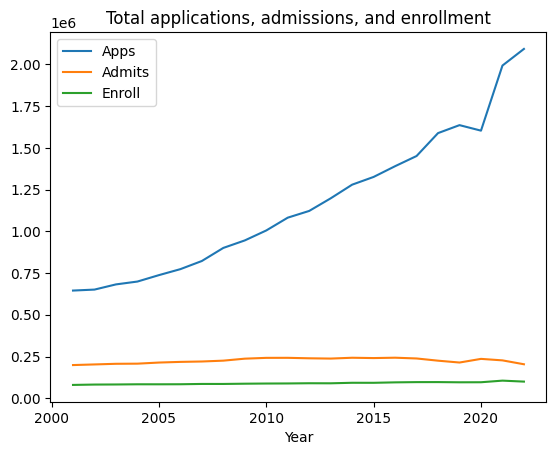

In [65]:
fig, ax = plt.subplots()

ax.plot(
    df[3]['Unnamed: 0_level_0|Admit Year (Fall)'],
    df[3]['Total|Apps'], label='Apps'
    )

ax.plot(
    df[3]['Unnamed: 0_level_0|Admit Year (Fall)'],
    df[3]['Total|Admits'], label='Admits'
    )

ax.plot(
    df[3]['Unnamed: 0_level_0|Admit Year (Fall)'],
    df[3]['Total|Enroll'], label='Enroll'
    )

title ='Total applications, admissions, and enrollment'
plt.title(title)
plt.xlabel('Year')

ax.legend()
plt.show()

### Private, Public, and Liberal Arts Colleges (27)

Rather than create three instances of the code respectively for Private, Public, and Liberal Arts Colleges, we can instead use a nested `for` loop, along with some string formatting to make sure our graphs are correctly labeled.

This is very similar to what we did with menu options for our restaurant in Part I.

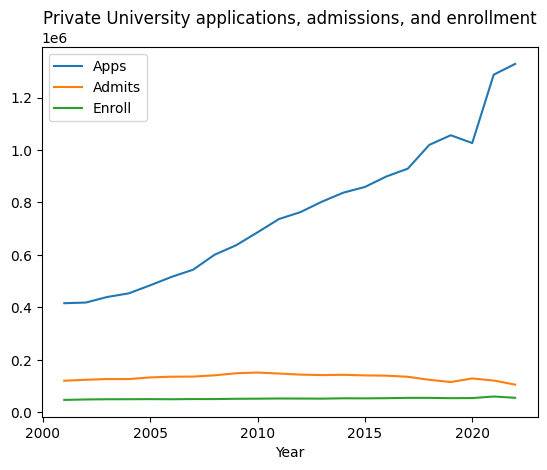

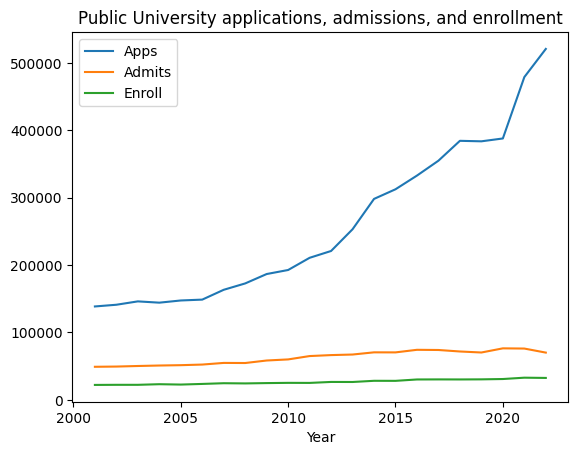

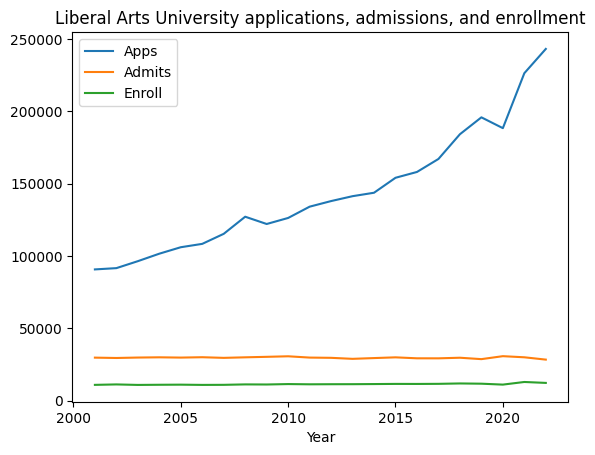

In [66]:
for campus_type in ['Private', 'Public', 'Liberal Arts']:

  fig, ax = plt.subplots()

  for stat in ['Apps', 'Admits', 'Enroll']:

    ax.plot(
      df[3]['Unnamed: 0_level_0|Admit Year (Fall)'],
      df[3]['{}|{}'.format(campus_type, stat)], label=stat
      )


  title = '{} University applications, admissions, and enrollment'.format(
    campus_type
    )

  plt.title(title)
  plt.xlabel('Year')

  ax.legend()
  plt.show()
  print('\n')


## Coding Exercise - Exporting Scraped Data

Now that we have our Wikipedia table scraped and stored in memory, we should probably store it somewhere.

If you're using a local installation of Python, such as running JupyterLab in Anaconda, you can save files directly to your hard drive.

Since we are in Google Colab, we have to do things the Google way. In order to save files, you will need to mount a Google drive to the notebook server, which we can do by using a specialized Python module for Colab, `google.colab`.

If you have not already created a Google account, you will need to do so at this step.

Running the next cell will open a pop-up window asking for you to grant Google Colab access to your Google drive.

In [67]:
from google.colab import drive

drive.mount('/drive', force_remount=True)

Mounted at /drive


Once you have successfully mounted your Google drive, create a new folder in it titled "PracticalPython".

Now, you will be able to export the DataFrame as an Excel (`.xlsx`) file. For other datasets, you may be better off exporting the data in different formats, such as `.csv`, `.json`, or `.parquet`.

In [68]:
df[3].to_excel('/drive/My Drive/PracticalPython/CollegeAdmissions.xlsx')

Wikipedia is great for demonstrating how to do web-scraping, because its pages generally have fairly uniform formatting.

Not all websites are as cleanly organized, however. Using `.read_html()` will not always be an option.

This next part will require a closer look at the HTML tags themselves, and will show you another way to get the same data from the College Admissions table into a DataFrame.



# The Hard Way: BeautifulSoup

What if pandas's `read_html()` doesn't work, or if the data you're trying to scrape isn't in a table?

There's another tool you can use to parse HTML: [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) (so-called because that mess of HTML tags is sometimes called "tag soup", and as a reference to a Lewis Carroll poem in *Alice's Adventures in in Wonderland* of the same name)

BeautifulSoup can parse HTML and XML files, allowing the user to quickly locate different tags and give structure to chaos. It's not as fast as `read_html()` but it does offer a lot of flexibility and control for the user.

*Note:* Even though we'd ordinarily use Beautiful soup when `.read_html()` *doesn't* work, we'll be using it on the same table here to show how different the process is.

In [69]:
# "soup" is our variable to store the content we pulled using requests
soup = BeautifulSoup(response.content)

In [70]:
dir(soup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'DEFAULT_INTERESTING_STRING_TYPES',
 'EMPTY_ELEMENT_EVENT',
 'END_ELEMENT_EVENT',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 'START_ELEMENT_EVENT',
 'STRING_ELEMENT_EVENT',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_clone',
 '_decode_markup',
 '_event_stream',
 '_feed',
 '_find_all',
 '_find_one',
 '_format_tag',
 '_indent_string',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descenda

BeautifulSoup lets us get text either from the entire page, or from individual tags. Here's what it looks like when we get the entire page:

In [71]:
soup.get_text()

'\n\n\nCollege admissions in the United States - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDonate\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\n Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1\nParticipants\n\n\n\n\nToggle Participants subsection\n\n\n\n\n\n1.1\nStudents\n\n\n\n\n\n\n\n\n1.2\nParents\n\n\n\n\n\n\n\n

### `.find_all()`

`.find_all()` lets us locate all elements on the page that match the specified tag. There is also a `.find()` method, but it's generally less useful since it defaults to grabbing the first element on the page that matches the tag.

Here we can see that the length of the container returned by `.find_all()` is 10, so we'll have to start looking through the tables.

In [72]:
tables = soup.find_all('table')
len(tables)

10

This is what the same table looks like as rows of HTML tags:

In [73]:
tables[3]

<table class="wikitable">
<caption>Applications, admission and enrollment at 56 schools with admit rate averaging below 22% in Fall 2019–Fall 2022.<sup class="reference" id="cite_ref-:3_56-0"><a href="#cite_note-:3-56"><span class="cite-bracket">[</span>56<span class="cite-bracket">]</span></a></sup><br/>Source: Common Data Sets / College announcements and publications
</caption>
<tbody><tr>
<th>
</th>
<th colspan="5">Total (56 institutions)
</th>
<th colspan="5">27 private universities
</th>
<th colspan="5">6 public universities
</th>
<th colspan="5">23 liberal arts colleges
</th></tr>
<tr>
<th>
</th>
<th colspan="5">
</th>
<th colspan="5"><small><a href="/wiki/Ivy_League" title="Ivy League">Ivy League</a>, <a href="/wiki/Stanford_University" title="Stanford University">Stanford</a>, <a href="/wiki/Massachusetts_Institute_of_Technology" title="Massachusetts Institute of Technology">MIT</a>, <a href="/wiki/University_of_Chicago" title="University of Chicago">UChicago</a>, <a href="/wik

## Table Headers

HTML uses `<th>` tags for table headers.

Here we use a `for` loop to locate all the headers in the table, which we will use to create column names in the DataFrame.

In [74]:
headers = []
for table in tables[3].find_all('th'):
  headers.append(table.text)

headers

['\n',
 'Total (56 institutions)\n',
 '27 private universities\n',
 '6 public universities\n',
 '23 liberal arts colleges\n',
 '\n',
 '\n',
 'Ivy League, Stanford, MIT, UChicago, Duke, Northwestern, Vanderbilt, Johns Hopkins, Rice, USC, WashU, Tulane, Tufts, Georgetown, Carnegie Mellon, Notre Dame, Emory, NYU, BU, Northeastern\n',
 'UCLA, UC Berkeley, Georgia Tech,\nUNC-Chapel Hill, UMich, UVA\n\n',
 'Pomona, Claremont McK, Swarthmore, Bowdoin, Amherst, Williams, Colby, Barnard, Pitzer, Bates, Harvey Mudd, Colorado Coll, Middlebury, Wesleyan, Hamilton, Haverford, Carleton, Davidson, Wellesley, W&L, Colgate, Grinnell, Vassar\n',
 'Admit Year (Fall)\n',
 'Apps\n',
 'Admits\n',
 'Enroll\n',
 'Admit rate\n',
 'Admit:enroll\n',
 'Apps\n',
 'Admits\n',
 'Enroll\n',
 'Admit rate\n',
 'Admit:enroll\n',
 'Apps\n',
 'Admits\n',
 'Enroll\n',
 'Admit rate\n',
 'Admit:enroll\n',
 'Apps\n',
 'Admits\n',
 'Enroll\n',
 'Admit rate\n',
 'Admit:enroll\n']

We can redefine headers to exclude the first 9 elements, and then use some list comprehensions to change the names in place.

In [75]:
headers = headers[10:]

headers = [header.replace('\n', '') for header in headers]
headers[1:6] = ["Total|"+header for header in headers[1:6]]
headers[6:11] = ["Private|"+header for header in headers[6:11]]
headers[11:16] = ["Public|"+header for header in headers[11:16]]
headers[16:21] = ["Liberal Arts|"+header for header in headers[16:21]]


In [76]:
headers

['Admit Year (Fall)',
 'Total|Apps',
 'Total|Admits',
 'Total|Enroll',
 'Total|Admit rate',
 'Total|Admit:enroll',
 'Private|Apps',
 'Private|Admits',
 'Private|Enroll',
 'Private|Admit rate',
 'Private|Admit:enroll',
 'Public|Apps',
 'Public|Admits',
 'Public|Enroll',
 'Public|Admit rate',
 'Public|Admit:enroll',
 'Liberal Arts|Apps',
 'Liberal Arts|Admits',
 'Liberal Arts|Enroll',
 'Liberal Arts|Admit rate',
 'Liberal Arts|Admit:enroll']

Next we can use a dictionary comprehension (yes, those exist, too) to change headers into the keys of a dictionary, and create an empty list as the value for each key.


In [77]:
headers = {header:[] for header in headers}

## Table Rows and Cells

HTML uses `<tr>` tags for table headers. In each row, `<td>` tags are used for individual cells.

The following is a more complicated statement involving a nested for loop with an if statement, the builtin `zip()` function which pairs elements of two iterables of equal length, and string methods to clean the table's text by removing commas, newline characters, and percent signs.

In [78]:
# Each row of the table contains an entry for every header.
for row in tables[3].find_all('tr'):

  #Parse rows into lists
  row_list = [td for td in row.find_all('td')]

  #If a row has the same length as headers, it's part of the table that contains
  # data
  if len(row_list) == len(headers):

    # Change rows to columns by iteratively adding each row element to a list
    # that will become a column.
    for item, header in zip(row_list, headers.keys()):

      #Append each item to a list in the headers dictionary
      #Delte "newline" characters and commas
      headers[header].append(item.text.replace('\n','').replace(',','').replace('%',''))

In [79]:
# The numbers from the table are stored as strings:
headers['Total|Admits']

['198815',
 '202565',
 '206423',
 '207238',
 '213865',
 '217846',
 '220200',
 '225242',
 '237141',
 '241971',
 '242188',
 '239371',
 '237696',
 '242628',
 '240687',
 '242910',
 '238317',
 '225082',
 '213999',
 '235872',
 '226931',
 '203618']

In [80]:
soup_df = pd.DataFrame(headers)

The statement `soup_df = pd.DataFrame(headers)` creates an instance of the Class DataFrame and populates it with the contents of the `headers` dictionary.

Let's take a look!

In [81]:
soup_df.head()

,Admit Year (Fall),Total|Apps,Total|Admits,Total|Enroll,Total|Admit rate,Total|Admit:enroll,Private|Apps,Private|Admits,Private|Enroll,Private|Admit rate,...,Public|Apps,Public|Admits,Public|Enroll,Public|Admit rate,Public|Admit:enroll,Liberal Arts|Apps,Liberal Arts|Admits,Liberal Arts|Enroll,Liberal Arts|Admit rate,Liberal Arts|Admit:enroll
0,2001,645111,198815,79872,30.8,2.49,415855,120124,46931,28.9,...,138627,49041,22110,35.4,2.22,90629,29650,10831,32.7,2.74
1,2002,650908,202565,82026,31.1,2.47,418230,123779,48626,29.6,...,141166,49377,22264,35.0,2.22,91512,29409,11136,32.1,2.64
2,2003,681989,206423,82544,30.3,2.50,439502,126504,49491,28.8,...,146165,50209,22262,34.4,2.26,96322,29710,10791,30.8,2.75
3,2004,699074,207238,83682,29.6,2.48,453319,126441,49615,27.9,...,144258,50923,23169,35.3,2.20,101497,29874,10898,29.4,2.74
4,2005,737493,213865,83591,29.0,2.56,484023,132750,49982,27.4,...,147507,51430,22639,34.9,2.27,105963,29685,10970,28.0,2.71


### Coding Exercise - `.info()`

Now, use the same `.info()` method on `soup_df` that we used earlier on`df[3]`. What differences do you notice?

In [82]:
################################################################################

#Your code goes here:



################################################################################

## Lambda Functions and `.apply()`

In order to use the data in a visualization, we need to convert it to a numeric format, since BeautifulSoup defaults to pulling in data as text (strings).

A quick way to create or modify new columns in a data frame is to use the `.apply()` method with and pass a function, often using the `lambda` keyword.

A Lambda function is an anonymous function (one that doesn't need to be named since it's used only in a local context).

In this case, since we're only using `int()` and `.float()` to change our data types, we do not *need* to use a lambda statement.

In [83]:
for column in soup_df.columns:

  # Turn strings of numbers into integers if possible
  try:
    #Less explicit:
    soup_df[column] = soup_df[column].apply(int)

    #More explicit:
    #soup_df[column] = soup_df[column].apply(lambda x: int(x))

  # Do not convert strings that contain "%"
  except ValueError:
    soup_df[column] = soup_df[column].apply(float)


In [84]:
soup_df.head()

,Admit Year (Fall),Total|Apps,Total|Admits,Total|Enroll,Total|Admit rate,Total|Admit:enroll,Private|Apps,Private|Admits,Private|Enroll,Private|Admit rate,...,Public|Apps,Public|Admits,Public|Enroll,Public|Admit rate,Public|Admit:enroll,Liberal Arts|Apps,Liberal Arts|Admits,Liberal Arts|Enroll,Liberal Arts|Admit rate,Liberal Arts|Admit:enroll
0,2001,645111,198815,79872,30.8,2.49,415855,120124,46931,28.9,...,138627,49041,22110,35.4,2.22,90629,29650,10831,32.7,2.74
1,2002,650908,202565,82026,31.1,2.47,418230,123779,48626,29.6,...,141166,49377,22264,35.0,2.22,91512,29409,11136,32.1,2.64
2,2003,681989,206423,82544,30.3,2.50,439502,126504,49491,28.8,...,146165,50209,22262,34.4,2.26,96322,29710,10791,30.8,2.75
3,2004,699074,207238,83682,29.6,2.48,453319,126441,49615,27.9,...,144258,50923,23169,35.3,2.20,101497,29874,10898,29.4,2.74
4,2005,737493,213865,83591,29.0,2.56,484023,132750,49982,27.4,...,147507,51430,22639,34.9,2.27,105963,29685,10970,28.0,2.71


Using the `.info()` method for the DataFrame, we can see under the column "Dtype" that we have converted Apps, Admits, and Enroll to integers, while Admit rate and Admit: enroll have become floats.

In [85]:
soup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Admit Year (Fall)          22 non-null     int64  
 1   Total|Apps                 22 non-null     int64  
 2   Total|Admits               22 non-null     int64  
 3   Total|Enroll               22 non-null     int64  
 4   Total|Admit rate           22 non-null     float64
 5   Total|Admit:enroll         22 non-null     float64
 6   Private|Apps               22 non-null     int64  
 7   Private|Admits             22 non-null     int64  
 8   Private|Enroll             22 non-null     int64  
 9   Private|Admit rate         22 non-null     float64
 10  Private|Admit:enroll       22 non-null     float64
 11  Public|Apps                22 non-null     int64  
 12  Public|Admits              22 non-null     int64  
 13  Public|Enroll              22 non-null     int64  
 

We have now cleaned our data enough that we can use it in a visualization!

# Your Turn!

Find a Wikipedia page with a table on it, and try to get Requests to work. Then, using `.read_html()`, get the table into a DataFrame.

What kind of visualization would best suit the data on your table?

In [ ]:
################################################################################

URL = '____'

your_response = requests.get(URL)

your_response

################################################################################

In [ ]:
################################################################################







################################################################################

## Example: Claremont, California

Here's a table showing historical population on the Wikipedia page for Claremont, California. We can turn it into a line plot.

In [87]:
response2 = requests.get('https://en.wikipedia.org/wiki/Claremont,_California')

In [88]:
df2 = pd.read_html(response2.content)

In [89]:
df2[2]

,Census,Pop.,Note,%±
0,1930,2719,NaN,—
1,1940,3057,NaN,12.4%
2,1950,6327,NaN,107.0%
3,1960,12633,NaN,99.7%
4,1970,24776,NaN,96.1%
5,1980,31028,NaN,25.2%
6,1990,32503,NaN,4.8%
7,2000,33998,NaN,4.6%
8,2010,34926,NaN,2.7%
9,2020,37266,NaN,6.7%


We have to drop the last row of this DataFrame becuase the kind of data in it doesn't match the other rows.


In [90]:
df2[2].drop(index=10,inplace=True)

In [91]:
df2[2]

,Census,Pop.,Note,%±
0,1930,2719,NaN,—
1,1940,3057,NaN,12.4%
2,1950,6327,NaN,107.0%
3,1960,12633,NaN,99.7%
4,1970,24776,NaN,96.1%
5,1980,31028,NaN,25.2%
6,1990,32503,NaN,4.8%
7,2000,33998,NaN,4.6%
8,2010,34926,NaN,2.7%
9,2020,37266,NaN,6.7%


In [92]:

df2[2]['Census'] = df2[2]['Census'].apply(int)
df2[2]['Pop.'] = df2[2]['Pop.'].apply(int)

In [93]:
df2[2]


,Census,Pop.,Note,%±
0,1930,2719,NaN,—
1,1940,3057,NaN,12.4%
2,1950,6327,NaN,107.0%
3,1960,12633,NaN,99.7%
4,1970,24776,NaN,96.1%
5,1980,31028,NaN,25.2%
6,1990,32503,NaN,4.8%
7,2000,33998,NaN,4.6%
8,2010,34926,NaN,2.7%
9,2020,37266,NaN,6.7%


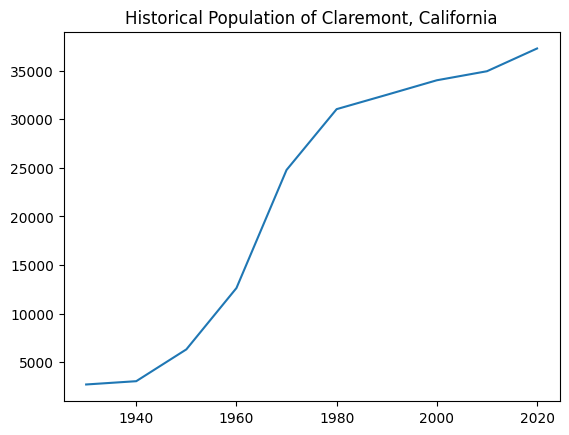

In [94]:
fig, ax = plt.subplots()
ax.plot(
    df2[2]['Census'],
    df2[2]['Pop.'], label=df2[2]['Census']
    )
plt.title('Historical Population of Claremont, California')
plt.show()

# Related Topics

Not all data is as easy to scrape (or parse) as Wikipedia aricles. Many webpages have data in other formats, or that comes from other sources.


We won't have time to cover all of these in depth, but we can provide a brief introduction to a few of them so you'll know what to look out for.

# Non-Table Data

Often, data on websites *looks* like it's in a table, but it might be stored using tags other than the "table", "td", "tr", etc. that are used for official "table" objects in HTML. Without explicit "table" tags, the pandas `.read_html()` parser won't work.

In these cases, it is necessary to inspect the webpage and find out what tags are actually being used to store the data.


In [96]:
result3 = requests.get('https://www.pomona.edu/administration/dining/menus/frary')

In [97]:
result3

<Response [200]>

In [ ]:
# This cell will produce a ValueError. Don't be alarmed! It's supposed to.

df_frary = pd.read_html(result3.content)

In [98]:
soup3 = BeautifulSoup(result3.content)

# Non-HTML Data

Pomona College's Frary Dining Hall's menu is actually stored in a file that is hosted in a separate location, which is used to populate the student-facing webpage.

This file is in a format called JSON (JavaScript Object Notation). JSON is similar to HTML in some ways, insofar as it stores data in flexibly-defined fields, but the syntax is very different.

Inspecting a page and looking in the HTML code can reveal much about how websites are constructed. After some poking around, I was able to locate the source of the menu items:

In [99]:
menu = soup3.find('div', id='dining-menu-from-json')

In [100]:
# Clicking the link in this HTML tag will take you to the source file:

menu

<div data-dining-menu-json-url="https://my.pomona.edu/eatec/Frary.json" id="dining-menu-from-json"></div>

# Inline Frames (iframes)

You may be trying to locate a particular element on the page while inspecting, and find that instead of an element like "div" or "h3", the tag shows "iframe".

Much the same as with external JSON or XML files, you may also encounter sites that embed and display HTML from other webpages. In order to isolate elements of the IFrame, you will have to get the URL for the Frame site, and use requests (or another Python module) to get that page's source directly.

IFrames are not as common in modern web development as they once were, but they still show up from time to time.

# Text Data - Constellate

We've so far only covered tabular data, which is a form of what is commonly called "structured data". You may find yourself working on a project for which the data source is written language, which is almost always considered "unstructured data" for purposes of analysis. If this is the case, you may have to employ other tools for gathering and processing it.

If you want to find out more about mining text data, the Library will be hosting a workshop on Tuesday, October 8th, 2024, that provides an introduction to Constellate, Ithaka/JSTOR's online platform for text data analysis and natural language processing.

Constellate also provides robust support for beginning and intermediate Python topics, some of which have not been covered in this workshop series.

We hope to see you there!

https://claremont.libcal.com/event/12812300

# Text & Data Mining - Library Research Guide

If you're looking for other ways to approach gathering and processing textual data, the Library's [Text and Data Mining](https://libguides.libraries.claremont.edu/TDM) research guide is a great place to start!

# End of Part II

Thank you for joining us! This has been a very incomplete guide to web scraping; there are lots of other tools and techniques you can employ.

For now, be safe out there! If you have any questions regarding web scraping, feel free to come by the Collaboratory for a drop-in consultation, or make an appointment.

Please be sure to fill out [this survey](https://forms.gle/GswemEQeLo1RTrGw7), so we can incorporate your feedback and keep improving our Library workshops.

*© 2024. This work is openly licensed via [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)*